# 회귀모델 만들기

- regression으로 특정 수치를 예측할 수 있음 
- classification은 분류로 예측할 수 있음
- clustering과 dimensionality reduction은 정답이 없는 데이터를 바탕으로 학습, 데이터 전처리에도 사용 (비지도학습)

In [1]:
# 필요한 라이브러리 로드
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib.pyplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
df=pd.read_csv("C:/Users/강태희/Documents/data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 학습, 예측 데이터셋 나누기

In [4]:
# label 값을 기준으로 나누기
# 나누기 전에 label 값을 시각화하기

(df['Insulin'] > 0).value_counts()

Insulin
True     394
False    374
Name: count, dtype: int64

In [5]:
# train 세트를 만들기

train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [6]:
# test 세트를 만들기

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

### 학습, 예측에 사용할 칼럼

In [9]:
# feature_names 라는 변수에 학습과 예측에 사용할 칼럼명을 가져오기

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

### 정답값이자 예측해야 될 값

In [10]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다

label_name = "Insulin"
label_name 

'Insulin'

### 학습, 예측 데이터셋 만들기

In [12]:
# 학습 세트 만들기 ex) 시험의 기출문제

X_train = train[feature_names]
X_train.shape

(394, 8)

In [13]:
# 정답 값을 만들어주기 ex) 기출문제의 정답

y_train = train[label_name]
y_train.shape

(394,)

In [14]:
# 예측에 사용할 데이터셋을 만든다 ex) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [15]:
# 예측의 정답값  ex) 실전 시험 문제의 정답

y_test = test[label_name]
y_test.shape

(374,)

### 머신러닝 알고리즘 학습

인슐린의 수치를 예측하는 것이므로 regression 사용하기

In [17]:
# 머신러닝 알고리즘 가져오기

from sklearn.tree import DecisionTreeRegressor

model= DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

In [18]:
# 머신러닝 알고리즘 훈련시키기 

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### cross validation으로 학습 세트의 오차 측정하기

In [25]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=5, verbose=2)  
y_predict[:5]

array([ 25., 480.,  55., 145., 495.])

In [26]:
# 정답을 정확하게 맞춘 갯수

(y_predict == y_train).sum()

3

<Axes: xlabel='Insulin'>

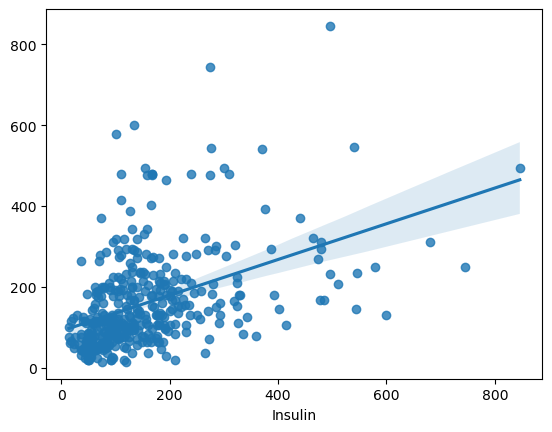

In [32]:
# regplot 으로 결과값을 비교한다

sns.regplot( x= y_train , y= y_predict)

# 인슐린 수치 400을 넘어갈수록 실제값과 예측값의 차이가 커지는걸 확인할 수 있음

In [31]:
# r2_score 구하기

from sklearn.metrics import r2_score

r2_score(y_train , y_predict)

-0.14429295602725567

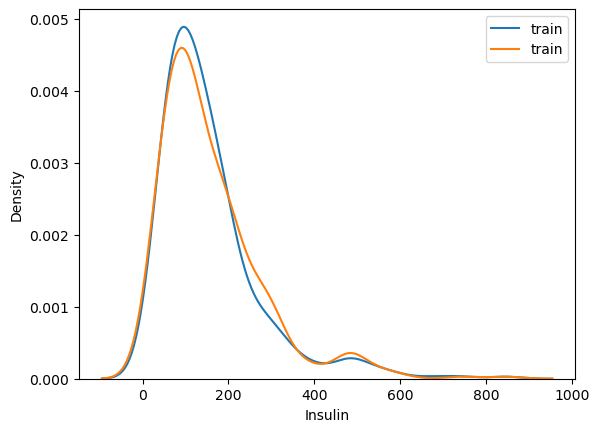

In [40]:
# kdeplot 으로 정답값과 예측값의 분포를 그린다

sns.kdeplot(y_train, label='train')
sns.kdeplot(y_predict, label='train')
plt.legend()
plt.show()

### 오차 구하기

In [46]:
# MAE
# 실제값과 예측값의 차이 구하기
# abs : 절댓값으로 변환
# abs( ).maen() : 차이값의 절댓값의 평균 구하기

error = abs(y_train - y_predict)
error.mean()

86.57106598984771

<Axes: xlabel='Insulin', ylabel='Density'>

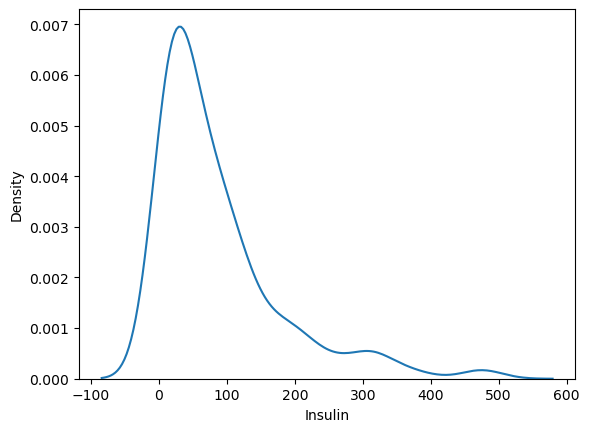

In [48]:
# 오차값을 시각화해보기

sns.kdeplot(error)

# 300 이상 크게 차이가 나는 값들 때문에 평균값이 편향된걸 확인할 수 있음

In [49]:
error.describe()

count    394.000000
mean      86.571066
std       92.896321
min        0.000000
25%       22.250000
50%       55.000000
75%      115.000000
max      495.000000
Name: Insulin, dtype: float64

In [51]:
# RMSE
# 구하는 값이 표준편차와 비슷함

np.sqrt(((y_train - y_predict) ** 2).mean())

126.89512636995443

### 트리 알고리즘 분석하기

- 의사결졍나무를 시각화한다
- 피처의 중요도를 구한다

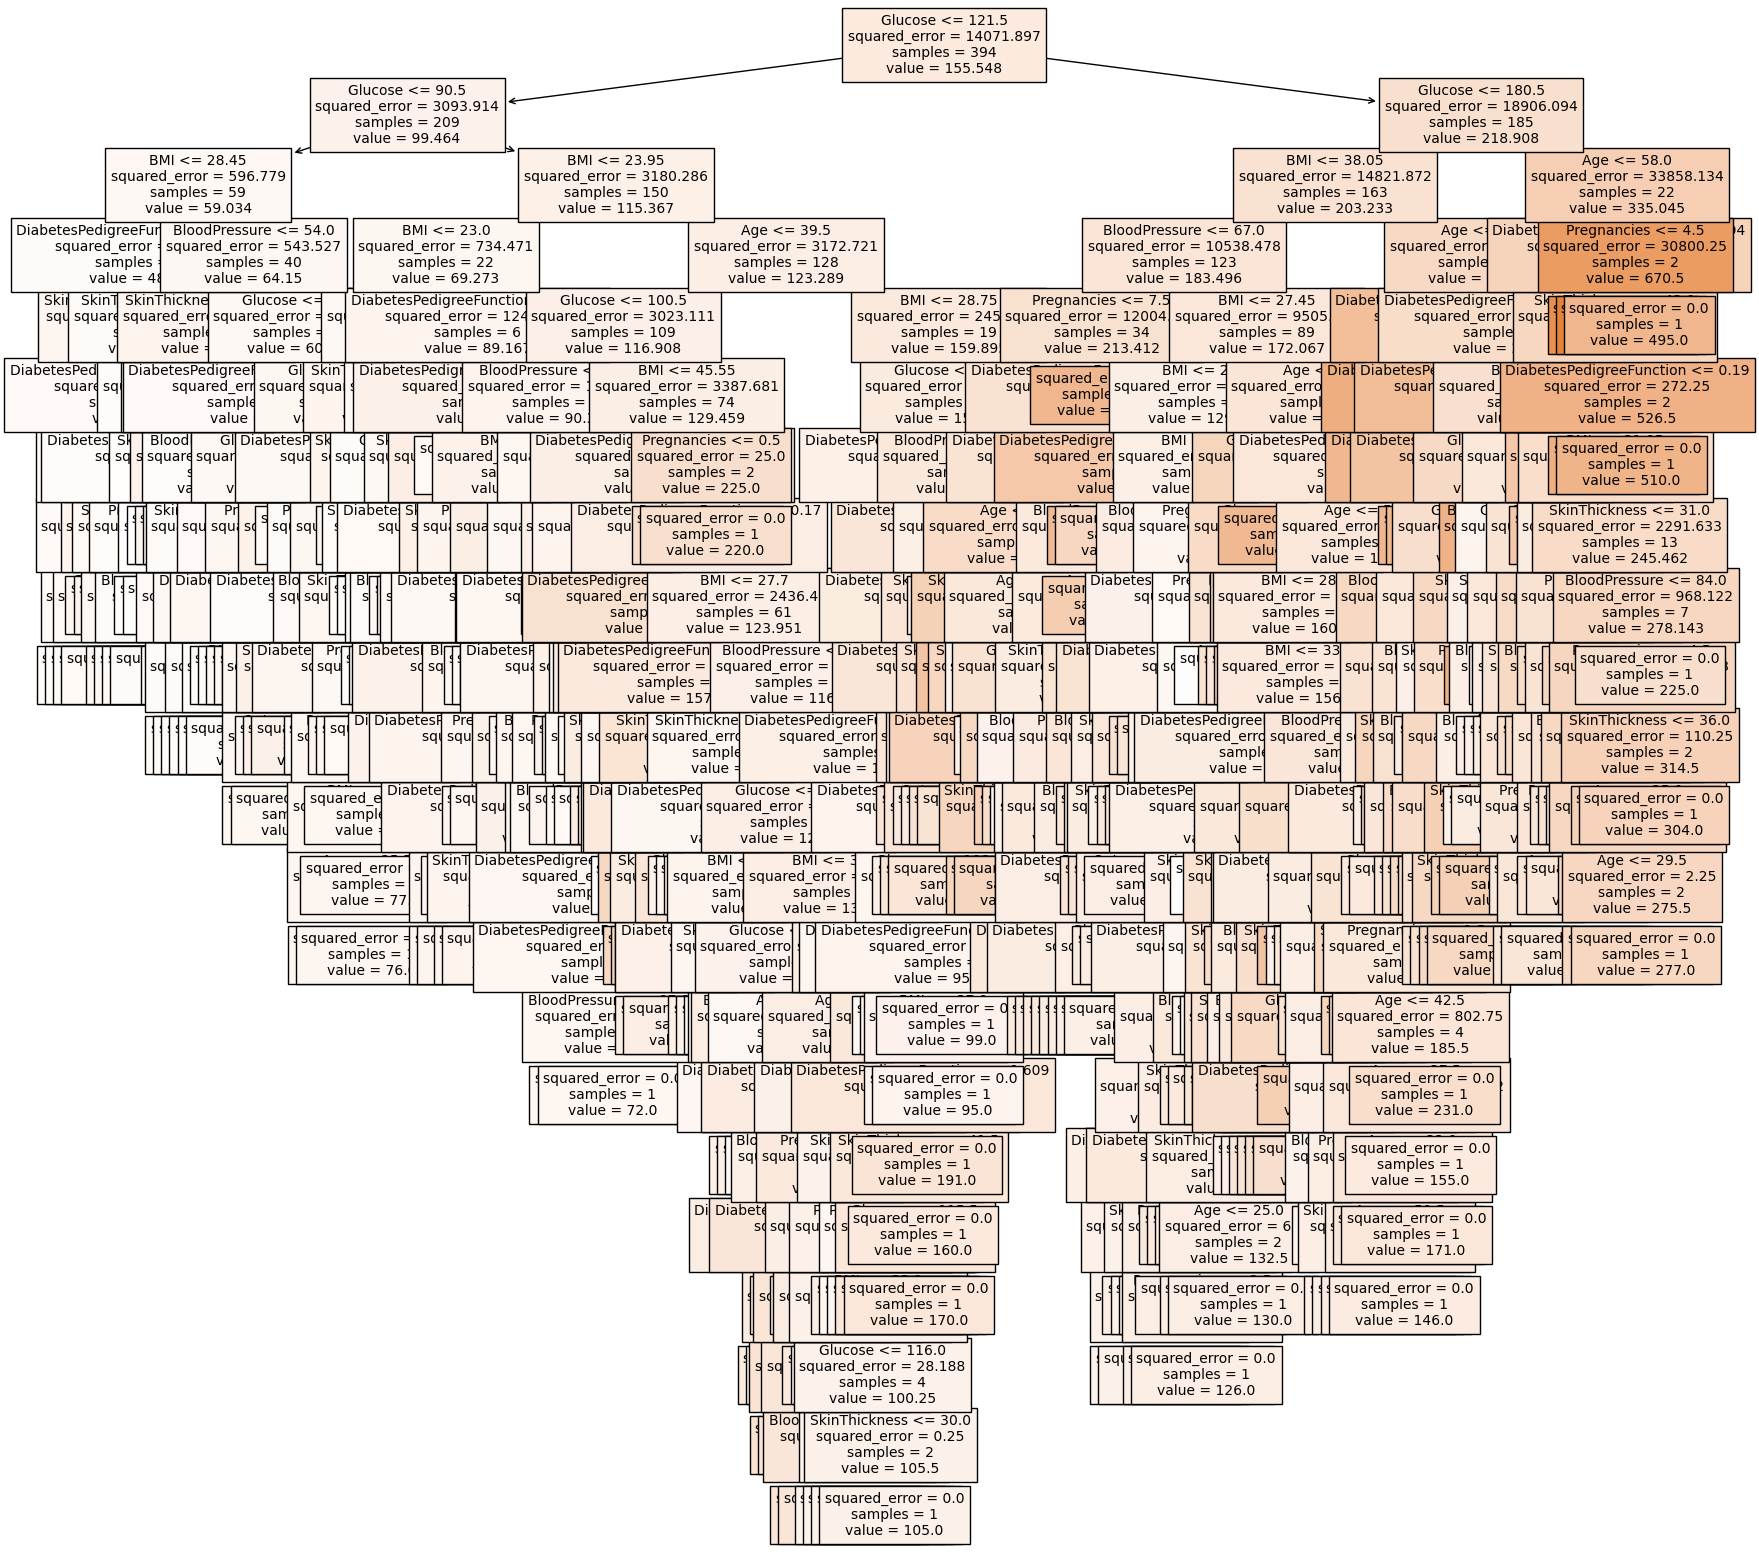

In [53]:
# plot_tree로 시각화하기

from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree= plot_tree(model, feature_names= feature_names, filled= True, fontsize= 10)

In [54]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([4.20201517e-02, 4.08219914e-01, 6.24932543e-02, 5.97519119e-02,
       1.10296456e-01, 1.63917473e-01, 1.52984660e-01, 3.16179009e-04])

<Axes: >

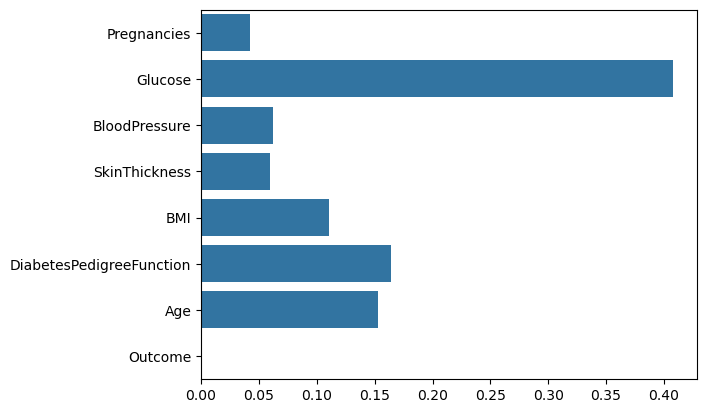

In [55]:
# 피처의 중요도 시각화하기

sns.barplot(x=model.feature_importances_, y=feature_names)

### 예측

- 실전 시험문제(X_test)라고 보고 정답을 직접 예측해보기
- 인슐린이 0인 값을 예측했기 때문에 정답을 알 수 없다, 따라서 점수는 train set로 측정한 값을 참고한다

In [56]:
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 145.,  36., 182.])

In [58]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [59]:
test["Insulin"] = y_test

In [60]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.161017,102.224032,15.0,64.0,99.5,158.25,600.0
1,138.0,212.434783,141.952236,44.0,115.0,176.0,267.00,846.0


<Axes: xlabel='Outcome', ylabel='Insulin'>

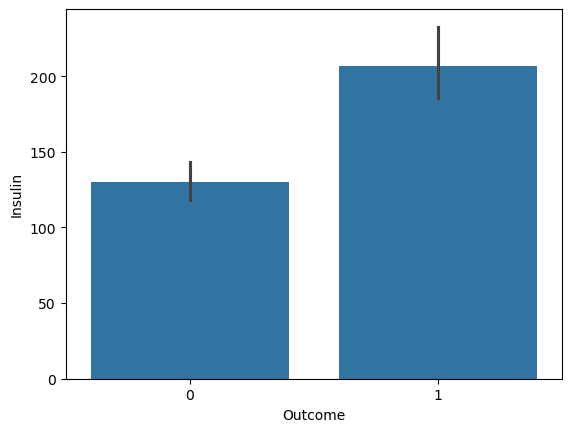

In [62]:
# 인슐린의 평균값을 출력

sns.barplot(data=train, x='Outcome', y='Insulin')

<Axes: xlabel='Outcome', ylabel='Insulin'>

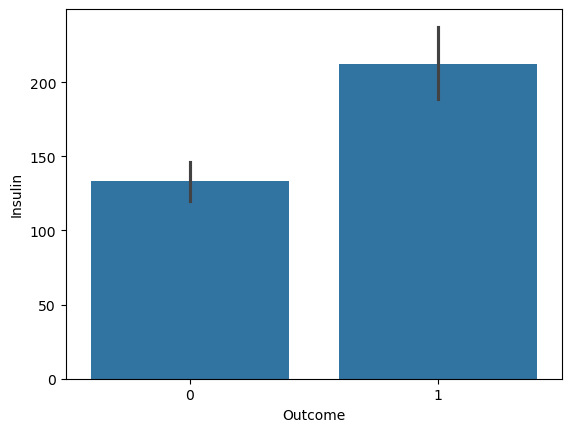

In [64]:
# 예측값에 대해 시각화

sns.barplot(data=test, x='Outcome', y='Insulin')